# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [391]:
# # this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [392]:
# Load the phone dataset
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [393]:
# view first five and last five entries of dataframe
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [394]:
# Determine the number of entries and the number of fields
df.shape

(3454, 15)

#### Observations:
* 3454 entries
* 15 fields

In [395]:
# View the data types for each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations:
* 4 fields store data as Strings.
* 9 fields store data as floats.
* 2 fields store data as integers.

In [396]:
# View the stats for the numerical fields
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


#### Observations:
* A minumum of 0.02GB for RAM seem extremely low. 
* The remaining values are reasonable at this point in the analysis.

In [397]:
# Check for duplicate entries
df.duplicated().sum()

0

#### Observation:
* There are no duplicate entries in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [398]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### 1. What does the distribution of normalized used device prices look like?

Mean: 4.36 
Median: 4.41


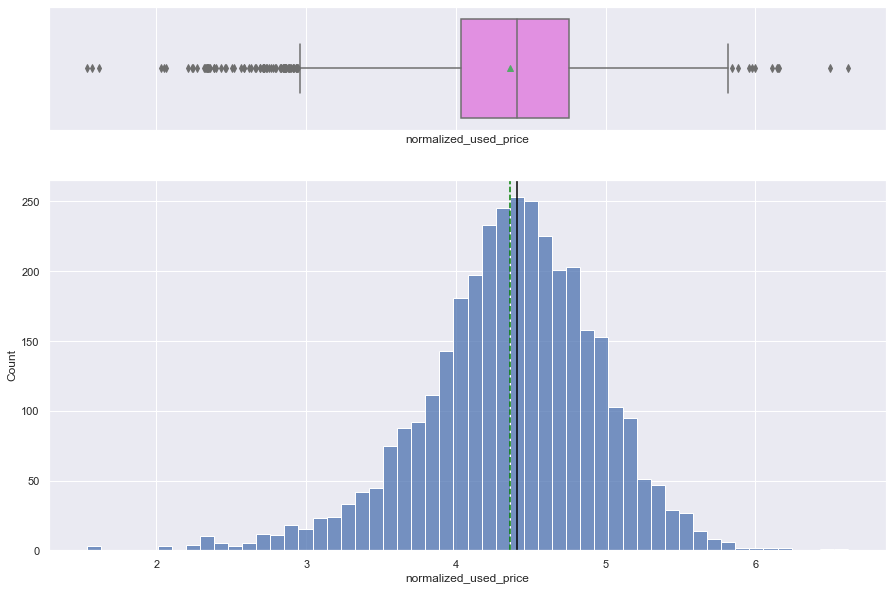

In [399]:
histogram_boxplot(df,"normalized_used_price")

print("Mean:", round(df["normalized_used_price"].mean(),2),"\nMedian:",round(df["normalized_used_price"].median(),2))

#### Observations: 
* The distribution of normalized used device prices has a slight left skew. 
* Mean: 4.36
* Median: 4.41
* There are numerous outliers both above and below the minumum and maximum for normalized used device prices.
<hr style="border:1px solid gray">
<br></br>

### 2. What percentage of the used device market is dominated by Android devices?

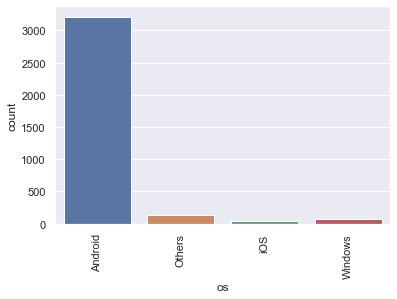

In [400]:
# Calculate the percentage of the used device market that run Android
round(df.os.value_counts()["Android"]/df.shape[0]*100,2)

sns.countplot(data=df, x = "os");
plt.xticks(rotation = 90)
plt.show()

#### Observation: 
* 93.05% of the phone on the used cell phone market run the Android operating system.
<hr style="border:1px solid gray">
<br></br>

### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

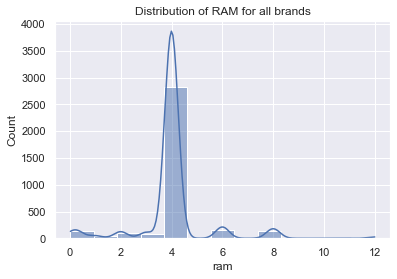

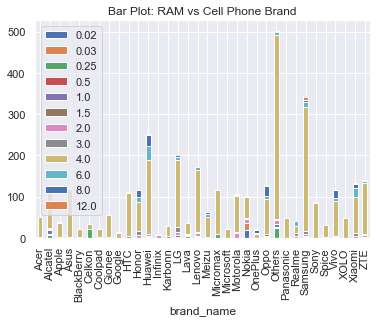

brand_name
Acer           96.078431
Alcatel        80.991736
Apple          87.179487
Asus           95.901639
BlackBerry     95.454545
Celkon         36.363636
Coolpad        95.454545
Gionee         98.214286
Google         73.333333
HTC            94.545455
Honor          60.344828
Huawei         71.314741
Infinix        20.000000
Karbonn        82.758621
LG             80.597015
Lava           77.777778
Lenovo         88.304094
Meizu          77.419355
Micromax       91.452991
Microsoft     100.000000
Motorola       83.018868
Nokia          48.113208
OnePlus        45.454545
Oppo           65.891473
Others         88.645418
Panasonic     100.000000
Realme         41.463415
Samsung        88.269795
Sony           97.674419
Spice          93.333333
Vivo           70.940171
XOLO          100.000000
Xiaomi         67.424242
ZTE            87.857143
Name: os, dtype: float64

In [401]:
plt.title("Distribution of RAM for all brands")
sns.histplot(data=df, x="ram",kde=True);
plt.show()

contingency_table = pd.crosstab(df['brand_name'],df['ram'])
contingency_table

contingency_table.plot(kind='bar',stacked =True)
plt.legend()
plt.title("Bar Plot: RAM vs Cell Phone Brand")
plt.show()

# df.groupby(["brand_name"],["ram"]==4).count()
# test = df.groupby(["brand_name","ram"])

#number of phones with 4GB of RAM per brand
test= df[df["ram"]==4].groupby(["brand_name"]).count()
test

#total number of phones per brand
test2 = df.groupby(["brand_name"]).count()
test2

# percent of phone with 4GB of RAM for each brand
fingers_crossed = test["os"]/test2["os"]*100
fingers_crossed


#### Observation: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
* 4GB of RAM is the most common amount across all brands
* 26 of 34 brands of phones have 70% or more of their phones equiped with 4 GB of RAM. 
<hr style="border:1px solid gray">
<br></br>

### 4. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

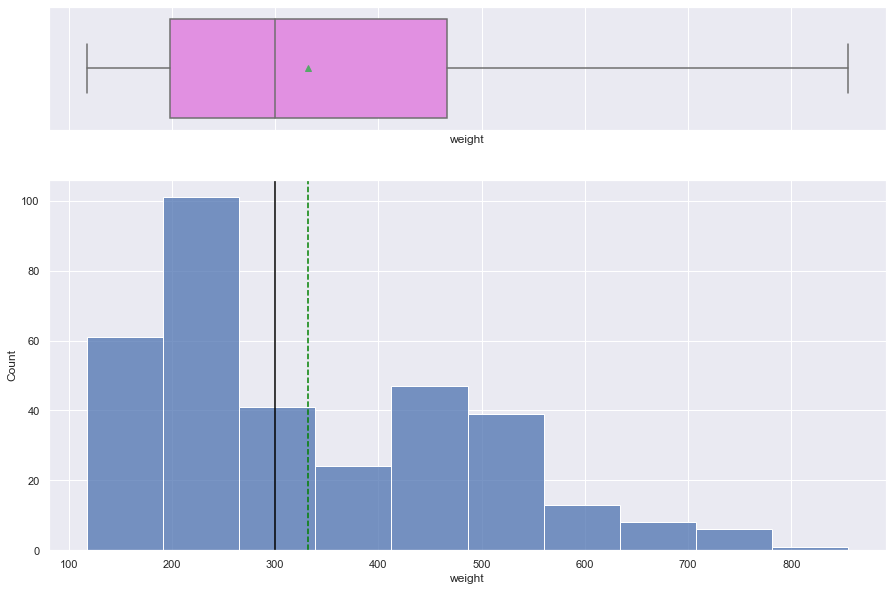

In [402]:
# Plot the distribution of weight for phones with more than 4500mAh
histogram_boxplot(df[df["battery"]>4500],"weight")

large_batteries = df[df["battery"]>4500]
large_batteries["weight"].describe()

#### Observations: 
* The distribution of weight for phones with large batteries has a right skew. 
* The mean is 332.28g while the median is 300.0g.
* There are no outliers.
<hr style="border:1px solid gray">
<br></br>

### 5. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [403]:
# Calculate the number of phones with screens greater than 6 inches
print( len(df[df["screen_size"]>6]))
print(round(len(df[df["screen_size"]>6]) / df.shape[0]*100,2))



3362
97.34


#### Observations: 
* 3362 phones and tablets have screens larger than 6". 
* 97.34% of the devices in the sample have screens larger 6".
<hr style="border:1px solid gray">
<br></br>

### 6.What is the distribution of devices offering greater than 8MP selfie cameras across brands?

Mean: 18.75 
Median: 16.0


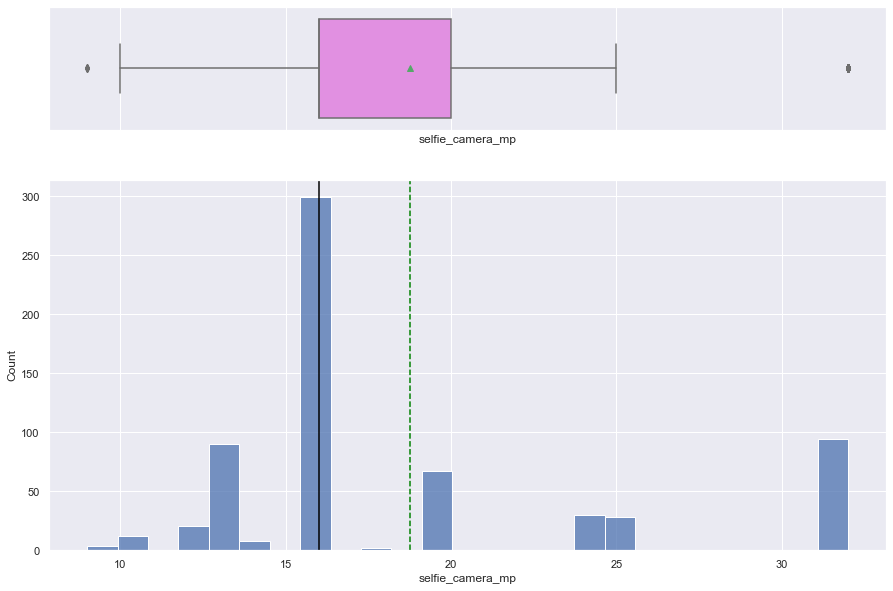

In [404]:
# Plot the distribution of phones and tabletes with selfier cameras with more than 8MP
selfie_data = df[df["selfie_camera_mp"]>8]
histogram_boxplot(selfie_data,"selfie_camera_mp")
print("Mean:", round(selfie_data["selfie_camera_mp"].mean(),2),"\nMedian:",round(selfie_data["selfie_camera_mp"].median(),2))

#### Observations: 
* The distribution of selfie camera megapixels greater than 8MP has a right skew. 
* There is an outlier below the minumum of 10 and one above the maximum of 25.

<hr style="border:1px solid gray">
<br></br>

### 7.  Which attributes are highly correlated with the normalized price of a used device?

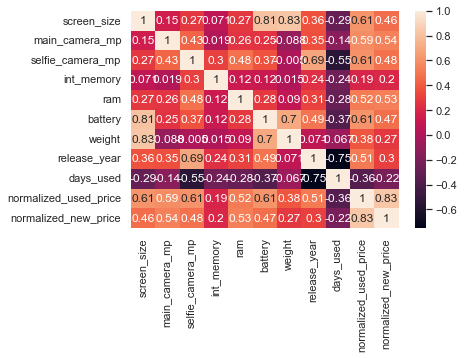

In [405]:
# Plot a heatmap of all the attributes
sns.heatmap(data=df.corr(),annot=True, cbar=True);


#### Observation: 
* Positively Correlated:
    * 0.83 normalized new price vs. normalized used price
    * 0.83 weight vs screen size
    * 0.81 battery vs screen size
    * 0.7 weight vs battery
    * 0.69 release year vs selfie camera mp
* Negatively Correlated:
    * -0.75 days used vs release year
    
<hr style="border:1px solid gray">
<br></br>

### Number of phones per brand name

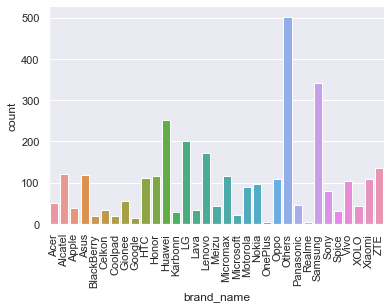

In [406]:
# sorted_brands = df.sort_values(by="brand_name")

sorted_brands = df.groupby('brand_name').value_counts().reset_index()
sorted_brands.sort_values('brand_name', ascending=False)

sns.countplot(data=sorted_brands, x = "brand_name");
plt.xticks(rotation = 90)
plt.show()

#### Observations:
* Samsung, Huawei, LG and Lenovo are the most common brands on the used device market.
* The cell phones and tablets labeled 'other" make up the biggest brand on the market. 

<hr style="border:1px solid gray">
<br></br>

    brand_name  normalized_used_price
5       Celkon               3.230888
29       Spice               3.694512
18    Micromax               3.761856
13     Karbonn               3.774956
15        Lava               3.854529
21       Nokia               3.911802
31        XOLO               3.931499
1      Alcatel               3.970264
24      Others               4.173466
19   Microsoft               4.205679
0         Acer               4.217408
25   Panasonic               4.218675
14          LG               4.296958
4   BlackBerry               4.314155
7       Gionee               4.330395
33         ZTE               4.368095
16      Lenovo               4.379596
12     Infinix               4.391207
6      Coolpad               4.399726
9          HTC               4.414975
20    Motorola               4.426133
27     Samsung               4.466590
3         Asus               4.510720
28        Sony               4.537851
26      Realme               4.594316
17       Mei

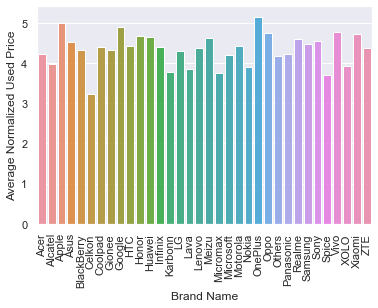

In [407]:
# df.groupby(["brand_name"],as_index=False).normalized_used_price.mean().plot(kind="bar");
bp = df.groupby(["brand_name"],as_index=False).normalized_used_price.mean()
sns.barplot(data=bp, x = "brand_name",y = "normalized_used_price");
plt.xticks(rotation = 90);
plt.ylabel("Average Normalized Used Price")
plt.xlabel("Brand Name")

print(bp.sort_values(by="normalized_used_price"))

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Values Treatment

In [408]:
# checks for missing values 
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations:
* The main camera megapixels field is missing 179 entries.
* selfie_camera_mp,int_memory,ram, battery and weight are also missing values.

### Imputing values for main camera mp

5.18% of the entries are missing values.
Number of phones with main cameras that have resolutions which fall outside IQR: 5
Mean resolution of main cameras: 9.460207633587805
Median resolution of main cameras: 8.0


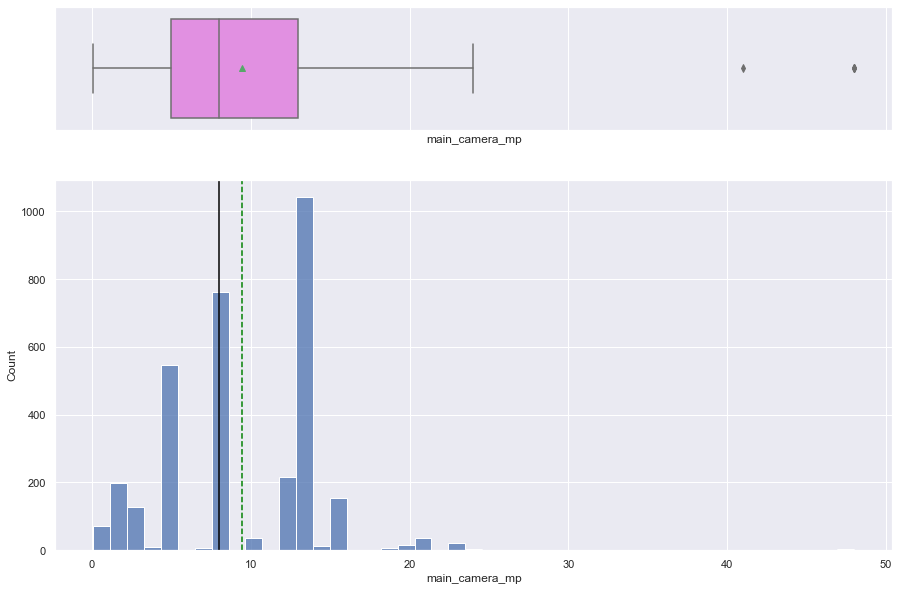

In [409]:
# Main_camera_mp has 179 missing entries. Determine what values to impute for missing entries.
histogram_boxplot(df, "main_camera_mp");
print(str(round(179/df.shape[0]*100,2))+"% of the entries are missing values.")
print("Number of phones with main cameras that have resolutions which fall outside IQR:",len(df[df["main_camera_mp"]>25]))
print("Mean resolution of main cameras:",df["main_camera_mp"].mean())
print("Median resolution of main cameras:",df["main_camera_mp"].median())

In [410]:
# Impute the median of the main camera mp. 
df['main_camera_mp'] = df['main_camera_mp'].fillna(
    value=df.groupby(["brand_name"])['main_camera_mp'].transform("median")
)
df['main_camera_mp'] = df['main_camera_mp'].fillna(value = 8.0)
print(df.shape[0])
df.isnull().sum()

3454


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Explanation:
* main_camera_mp column was missing 179 entries. 5.18% of the entries.
* The missing values were imputed with the median value of main_camera_mp for each brand name, because main_camera_mp has continous data and five outliers.

### Imputing values for the remain fields with missing values

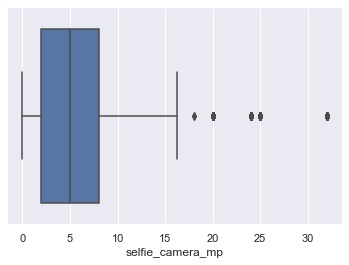

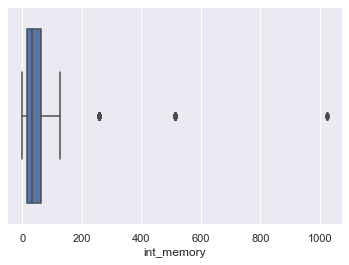

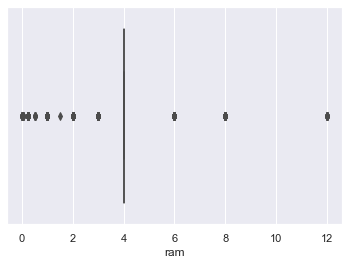

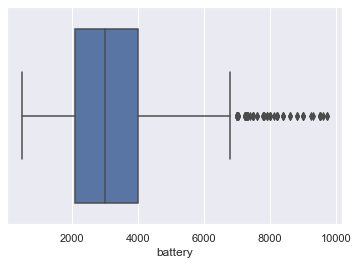

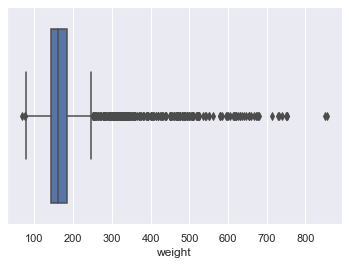

In [411]:
columns =['selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

for col in columns:
    sns.boxplot(data=df, x=col)
    plt.show()

In [412]:
# Impute the median as the following fields contain continous data with outliers.
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(
    value=df.groupby(["brand_name"])['selfie_camera_mp'].transform("median"))

df['int_memory'] = df['int_memory'].fillna(
    value=df.groupby(["brand_name"])['int_memory'].transform("median"))

df['ram'] = df['ram'].fillna(
    value=df.groupby(["brand_name"])['ram'].transform("median"))

df['battery'] = df['battery'].fillna(
    value=df.groupby(["brand_name"])['battery'].transform("median"))

df['weight'] = df['weight'].fillna(
    value=df.groupby(["brand_name"])['weight'].transform("median"))
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Explanation:
* The median values for selfie_camera_mp, int_memory, ram, battery and weight were imputed for missing values.
* These fields contained continous data with outliers.

<hr style="border:1px solid gray">
<br></br>

### Feature Engineering

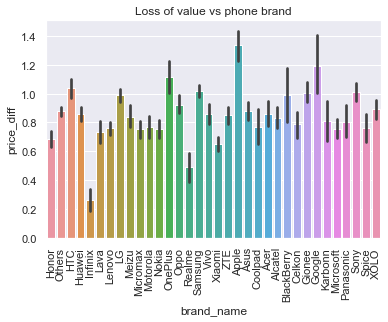

In [413]:
# Calculate the difference between the cost of a new phone and a refurbished phone of the same model.
# Create a new field - price_diff
df["price_diff"]=df["normalized_new_price"]-df["normalized_used_price"]


plt.title("Loss of value vs phone brand")
sns.barplot(data=df, x = "brand_name", y = "price_diff");
plt.xticks(rotation=90)
plt.show()

#### Observations:
* price_diff stores the difference between the price of a new phone and a refurbished phone of the same model.
* New Apple iPhone, Google and OnePlus devices lose the most value when they are later sold on the used phone/tablet market.
* Infinix and Realme retains their value the best.

<hr style="border:1px solid gray">
<br></br>

### Outlier detection and treatment 

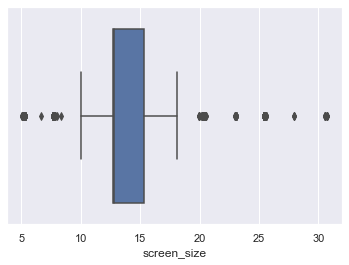

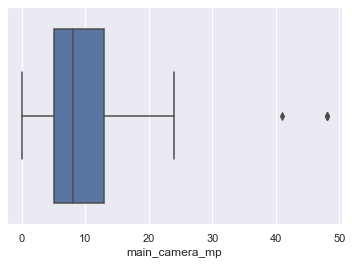

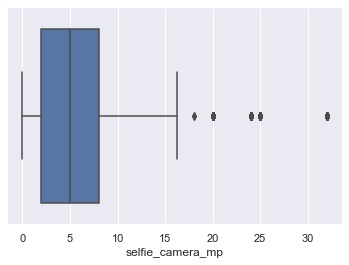

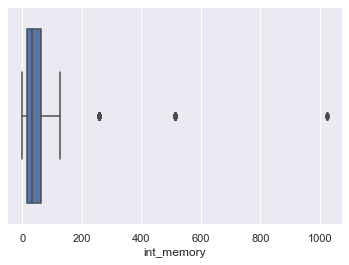

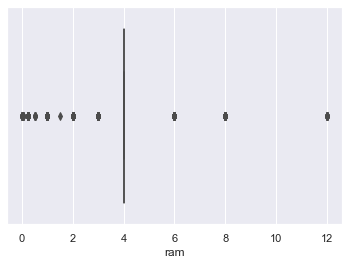

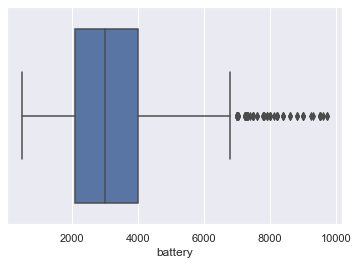

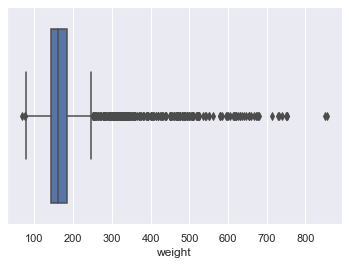

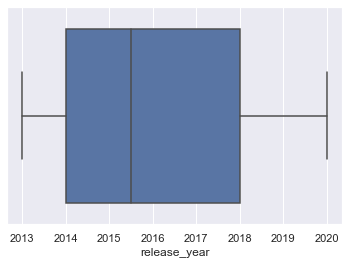

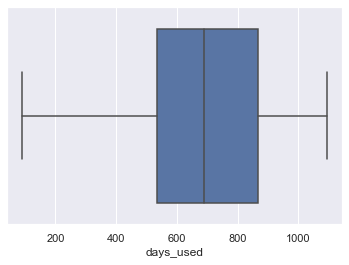

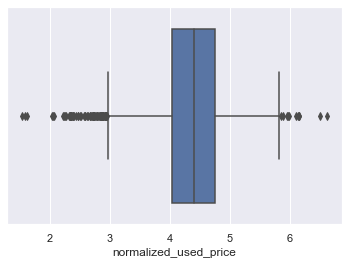

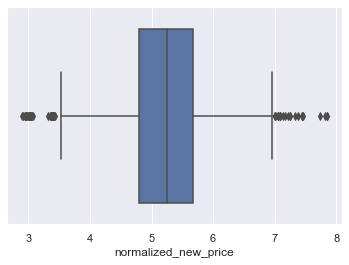

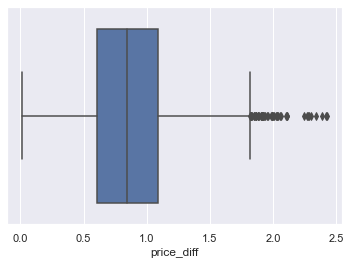

In [414]:
columns =['screen_size', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'price_diff']

for col in columns:
    sns.boxplot(data=df, x=col)
    plt.show()



In [415]:
# Drop all entries where the RAM is less than 1GB.
print(df.shape)
df.drop(df[df["ram"] < 1].index, inplace=True)
print(df.shape)

(3454, 16)
(3327, 16)


#### Explanations:
* RAM - All outliers less than 1GB RAM were removed. An internet search shows that the Android operating system will not run on 1GB of RAM. https://www.news18.com/news/tech/google-says-android-phones-cannot-run-on-1gb-ram-anymore-5939239.html
* The outliers in other fields are true outliers.

<hr style="border:1px solid gray">
<br></br>

### Preparing data for modeling

In [416]:
# Defining predicator and y variables
X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  price_diff  
0        127              4.715100    0.407528  
1        325              5.519018    0.356921  
2        162              5.884631    0.7

In [417]:
# Add the intercept to data
X = sm.add_constant(X)

In [418]:
# Create dummy variables for categorical fields - brand_name, operating system, 4g, 5g, 
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [419]:
# separate the dataframe into training and testing sets. 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<hr style="border:1px solid gray">
<br></br>

## EDA

- It is a good idea to explore the data once again after manipulating it.

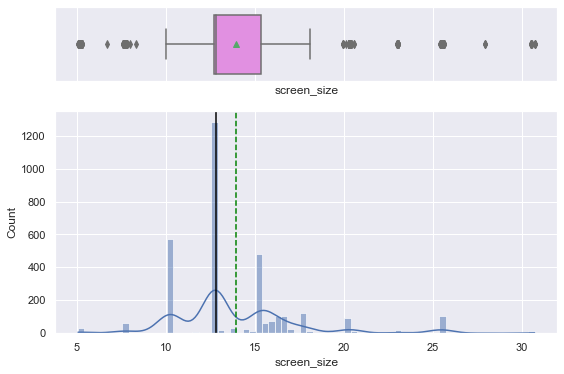

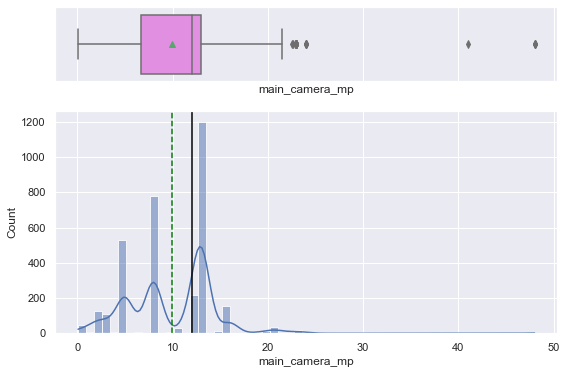

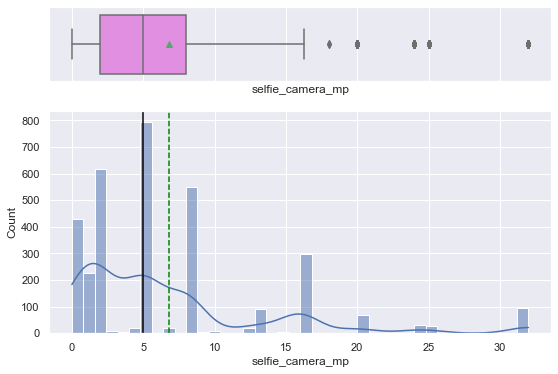

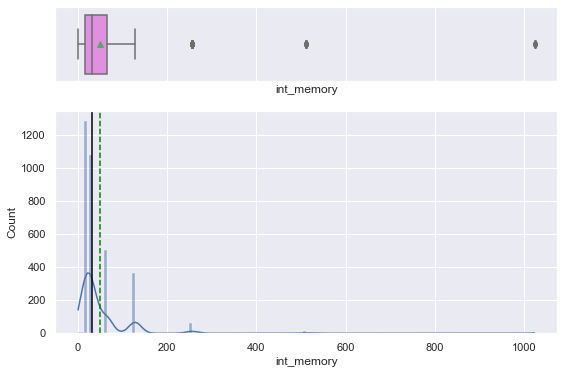

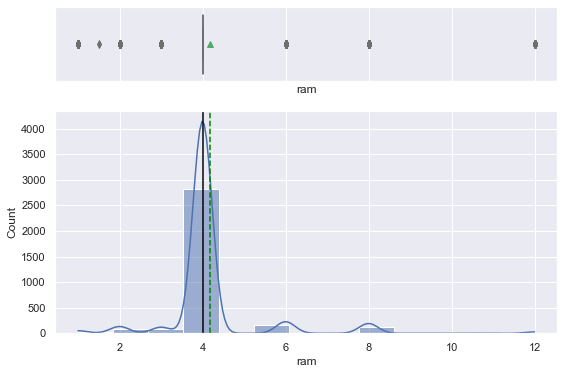

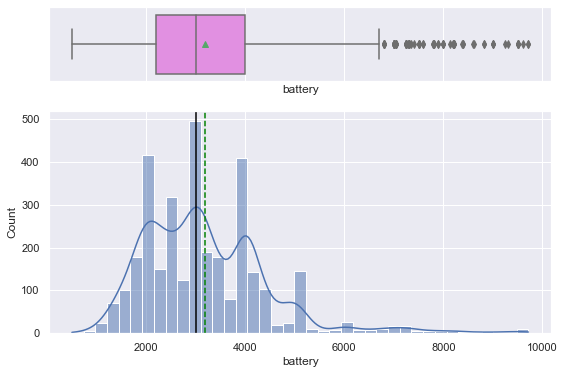

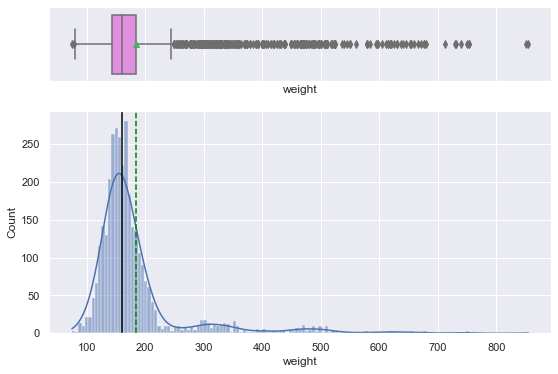

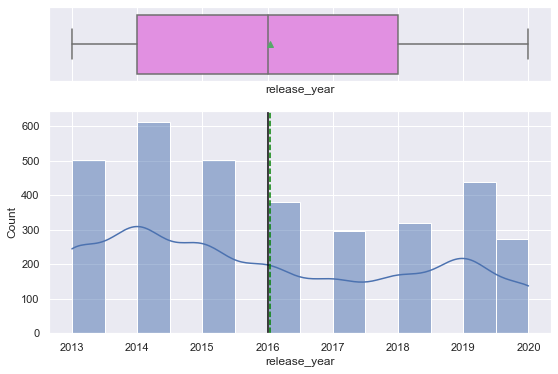

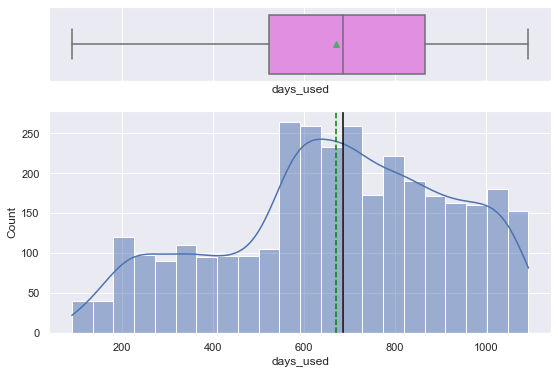

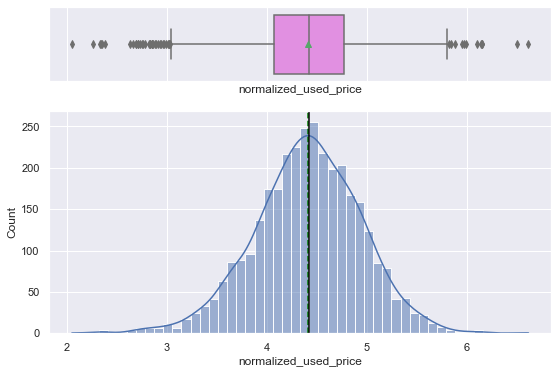

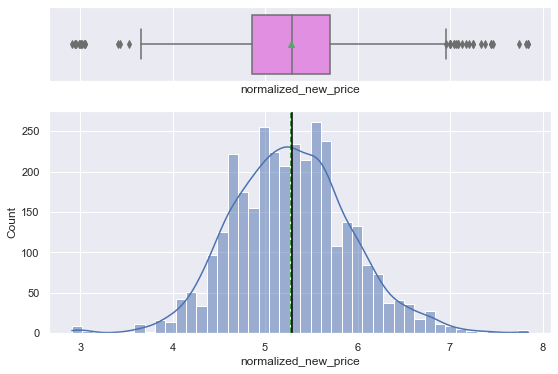

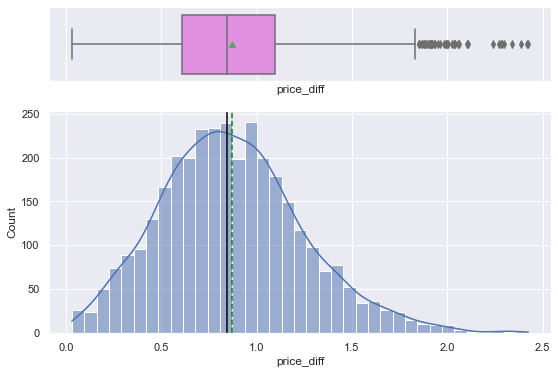

In [420]:

columns =['screen_size', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'price_diff']

for col in columns:
    histogram_boxplot(df, col,figsize=(9, 6), kde=True)
    plt.show()

### Observations: 
* The distribution of the numeric predictor variables did not change greatly.

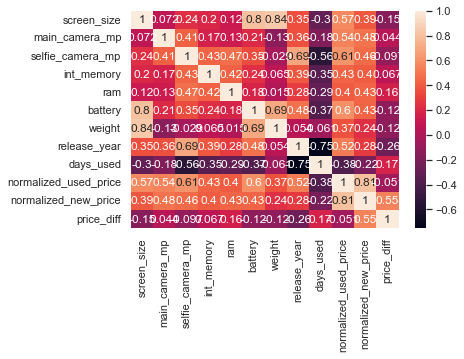

In [421]:
# Which attributes are highly correlated with the normalized price of a used device?
sns.heatmap(data=df.corr(),annot=True, cbar=True);

### Observations: 
* No significant changes to the correlation values that exist between the columns.

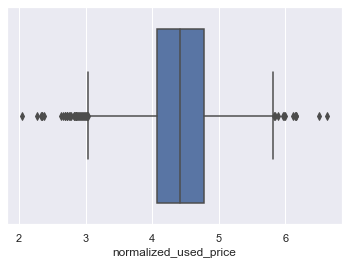

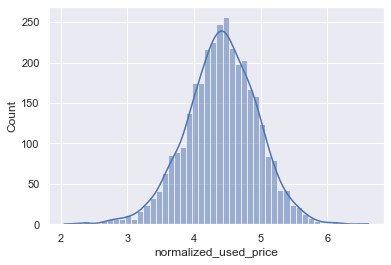

Mean: 4.41 
Median: 4.42


In [422]:
#What does the distribution of normalized used device prices look like?
sns.boxplot(data=df, x="normalized_used_price");
plt.show()

sns.histplot(data=df, x="normalized_used_price", kde=True);
plt.show()

print("Mean:", round(df["normalized_used_price"].mean(),2),"\nMedian:",round(df["normalized_used_price"].median(),2))

### Observations:
* The distribution of the normalized price for used cell phones has a more normal distribution after the data processing.
* The difference between the mean and median is only 0.01.
* There are still outliers for the normalized price for used cell phone.

<hr style="border:1px solid gray">
<br></br>

## Model Building - Linear Regression

In [423]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 6.567e+26
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           09:36:22   Log-Likelihood:                 65537.
No. Observations:                   2328   AIC:                        -1.310e+05
Df Residuals:                       2278   BIC:                        -1.307e+05
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Observations:
* $R^2$ is 1.0. It indicates that the model explains all the variance in the data. 
* Adjusted. $R^2$ is 1.0.  It indicates that the model fits the data perfectly.
* The model may overfit the data.
* const coefficient is 1.727e-12. The regression line intersects the y-axis close to 0.

<hr style="border:1px solid gray">
<br></br>

## Model Performance Check

In [424]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
print(olsmodel_train_perf)

# checking model performance on test set (seen 30% data)
print("\n\nTest Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
print(olsmodel_test_perf)

Training Performance

           RMSE           MAE  R-squared  Adj. R-squared          MAPE
0  1.437814e-13  1.413308e-13        1.0             1.0  3.228073e-12


Test Performance

           RMSE           MAE  R-squared  Adj. R-squared          MAPE
0  1.438453e-13  1.414755e-13        1.0             1.0  3.207390e-12


### Observations:
* The training $R^2$ is 1.0. It suggests that the model is overfit.
* The train and test RMSE and MAE are similar.
* MAE indicates that the model can predict the normalized used price within a mean error of 1.414755e-13 on the test data
* MAPE of 3.207390e-12 indicates that the model can predict within 3.207390e-12 of the normalized use price 

<hr style="border:1px solid gray">
<br></br>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### TEST FOR MULTICOLLINEARITY

In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(x_train)

,feature,VIF
0,const,3.908059e+06
1,screen_size,6.423515e+00
2,main_camera_mp,2.334719e+00
3,selfie_camera_mp,3.165610e+00
4,int_memory,1.509089e+00
5,ram,2.289653e+00
6,battery,4.077298e+00
7,weight,5.845658e+00
8,release_year,5.016321e+00
9,days_used,2.606763e+00


### Observations:
* screen_size, weight, release_year, normalized_new_price have VIF values greater than 5. These VIF values suggest that the columns are correlated with one or more of the other predictor variables.
* These predictor variables will be removed one at a time.
* The dummy variables with VIF values greater than 5 will be ignored.

In [426]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

col_list = ["screen_size", "weight", "release_year", "normalized_new_price"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,1.00000,3.866231e-14
1,weight,1.00000,5.555478e-14
2,release_year,1.00000,1.376137e-13
3,normalized_new_price,0.75824,2.657720e-01


### Markdowns:
* The adjusted $R^2$ remains 1.00000 after dropping screen_size, weight and release_year individually.
* release_year made the smallest difference to the RMSE value after being dropped. 

In [427]:
# Drop release_year. It made the least change to the RMSE
col_to_drop = "release_year"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,265.537441
1,screen_size,6.301596
2,main_camera_mp,2.333985
3,selfie_camera_mp,2.858761
4,int_memory,1.483760
5,ram,2.280258
6,battery,3.909812
7,weight,5.615653
8,days_used,1.936752
9,normalized_new_price,5.954428


In [428]:
col_list = ["screen_size", "weight", "normalized_new_price"]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,1.000000,1.539036e-13
1,weight,1.000000,5.626052e-13
2,normalized_new_price,0.756167,2.669087e-01


#### Observation:
* Screen size and weight have an adjusted $R^2$ of 1. 
* Screen size is dropped because made the smallest change to the RMSE after being dropped.

In [429]:
# Drop screen_size. It made the least change to the RMSE
col_to_drop = "screen_size"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,251.982918
1,main_camera_mp,2.322812
2,selfie_camera_mp,2.853938
3,int_memory,1.483240
4,ram,2.264048
5,battery,3.579238
6,weight,3.351019
7,days_used,1.875849
8,normalized_new_price,5.748007
9,price_diff,2.873691


#### Observation:
* normalized_new_price continues to have a VIF greater than 5.74. 

In [430]:
# Drop normalized new price because it has multicollinearity with another predictor variable
col_to_drop = "normalized_new_price"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  normalized_new_price


,feature,VIF
0,const,114.984138
1,main_camera_mp,1.829036
2,selfie_camera_mp,2.567417
3,int_memory,1.428547
4,ram,2.203964
5,battery,3.570544
6,weight,2.884161
7,days_used,1.874233
8,price_diff,1.284829
9,brand_name_Alcatel,2.951031


#### Observations:
* After removing "release_year","screen_size" and "normalized_new_price" from dataframe, no predictor variables had VIF values greater than 5 except for the dummy variables. 
* The remaining predictor values have low multicollinearity. There should be no problems when the model is fitted, and the results are interpretted.

In [431]:
# Create a model without the three predictors which had high multicollinearity
olsmod1 = sm.OLS(y_train, x_train4).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.753
Model:                               OLS   Adj. R-squared:                  0.748
Method:                    Least Squares   F-statistic:                     150.8
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           09:36:23   Log-Likelihood:                -245.17
No. Observations:                   2328   AIC:                             584.3
Df Residuals:                       2281   BIC:                             854.7
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations:
* The adjusted $R^2$ dropped from 1.000 to  0.748. 
* The $R^2$ dropped from 1.000 to 0.753.
* The drop in adjusted $R^2$ and $R^2$ suggests that the new model will not overfit the data.


### Handling P-values for predictor variables

In [432]:
'''
Dummy variables with p-values greater than 0.05 do not have a significant impact on the price of used devices. 
Each variable with a p-value greater than 0.05 will be droppped one at a time as some variables 
influence the significance of other variables.
'''

# initial list of columns
predictors = x_train4.copy()
cols = predictors.columns.tolist()
print(len(cols))

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(47-len(selected_features))
print(selected_features)

47
21
['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'price_diff', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Lenovo', 'brand_name_Micromax', 'brand_name_Motorola', 'brand_name_OnePlus', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Spice', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [433]:
# Keep only predictor variables whose p-values are less 0.05
x_train5 = x_train4[selected_features]
x_test5 = x_test4[selected_features]

olsmod2 = sm.OLS(y_train, x_train5).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.750
Model:                               OLS   Adj. R-squared:                  0.747
Method:                    Least Squares   F-statistic:                     276.3
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           09:36:23   Log-Likelihood:                -256.68
No. Observations:                   2328   AIC:                             565.4
Df Residuals:                       2302   BIC:                             714.9
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [434]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train5, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.270176,0.202342,0.750054,0.74723,4.721165


In [435]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test5, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.273938,0.203135,0.727677,0.720393,4.678426


#### Observations:
* 21 predictor values had p-values greater than 0.05. They were removed from the model.
* The $R^2$ value was lowered to 0.750. The updated model can explain roughly 75% of the variance in the data.
* The adjusted $R^2$ was reduced to 0.747. 

### TEST FOR LINEARITY AND INDEPENDENCE

In [436]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
2657,5.001931,4.898201,0.103729
3383,3.879087,4.128159,-0.249072
1885,4.091674,3.864096,0.227579
1252,3.729301,3.990572,-0.261271
1326,4.175156,4.403047,-0.227891


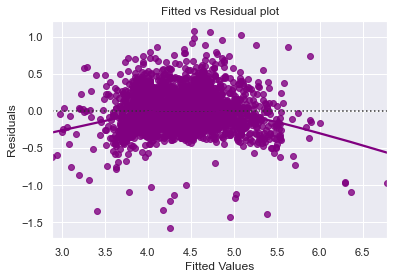

In [437]:
# Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:
* No clear pattern exists between the fitted values and the residuals(actual values-fitted values).
* The lack of a pattern indicates that there is a linear relationship between the predictor variables and the normalized used price of cell phones.
* The lack of a pattern also indicates that the residuals are independent. 

### TEST FOR NORMALITY

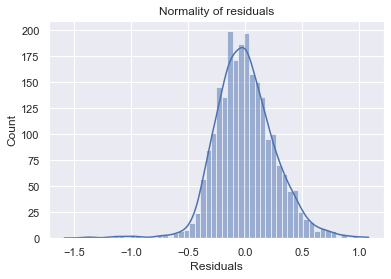

Mean: 0.0
Median: -0.01


In [438]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

print("Mean:",round(df_pred["Residuals"].mean(),2))
print("Median:",round(df_pred["Residuals"].median(),2))

#### Observations:
* The distribution of residuals has a slight left skew.
* The mean and median of the residuals are close. 
* The median is -0.01. This indicates that nearly have the values are above the regression line(fitted values) and nearly half are found below the line.

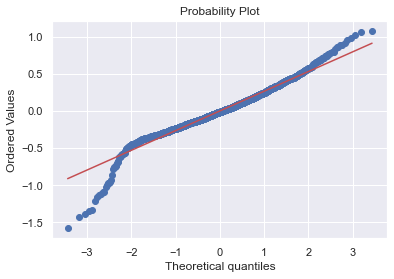

In [439]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
* If the residuals had a perfect normal distribution, the data would fall upon the red line in the Q-Q plot. 
* The values that contribute to the left skew in the residual distribution appear more clearly on the left side of the Q-Q plot.

In [440]:
# Shapiro-Wilks test can be used to test the null hypothesis that residuals are normally distributed.
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9671083688735962, pvalue=1.1899129931610705e-22)

#### Observations:
* The p-value from the Shapiro test is less than 0.05. There is not enough evidence to support the null hypothesis that the residuals are normally distributed.
* However, the residual distribution shown in the histogram and the Q-Q plot suggest the residual values approximate a normal distribution well enough to satisfy the assumption. 

### TEST FOR HOMOSCEDASTICITY

In [441]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5)
lzip(name, test)

[('F statistic', 0.8840921865301334), ('p-value', 0.9810906957031287)]

### Observations: Homoscedasticity
* The p-value from the Goldfeld-Quandt test is 0.98. It is greater than 0.05. 
* There is enough evidence to support the null hypothesis that the residuals are homoscedastic. The variance of the residuals is distributed symetrically on either side of the regression line.

In [442]:
# Test the test data
pred = olsmod2.predict(x_test5)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred,"Residual":y_test-pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted,Residual
2485,4.573783,4.536736,0.037047
44,5.674182,5.704572,-0.030390
2463,3.971423,4.119629,-0.148206
2219,4.005878,4.176450,-0.170572
1394,3.316003,3.782047,-0.466045
2299,4.097672,4.062991,0.034682
66,4.726768,5.018457,-0.291689
1751,3.225255,3.685971,-0.460715
1609,4.263806,3.813449,0.450357
634,4.154655,4.230967,-0.076312


### Observation:
* The difference between the actual and predicted values are fairly close for the test dataset. This suggests that the model does well at predicting results.

## Final Model

In [443]:
x_train_final = x_train5.copy()
x_test_final = x_test5.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.750
Model:                               OLS   Adj. R-squared:                  0.747
Method:                    Least Squares   F-statistic:                     276.3
Date:                   Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                           09:36:25   Log-Likelihood:                -256.68
No. Observations:                   2328   AIC:                             565.4
Df Residuals:                       2302   BIC:                             714.9
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [444]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.270176,0.202342,0.750054,0.74723,4.721165


In [445]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.273938,0.203135,0.727677,0.720393,4.678426


### Observations:
* The $R^2$ value is 0.727677. The model explains 73% of the variance in the data.
* The MAPE of 4.678426 indicates that the model can accurately predict a result within 4.68% of the actual value of price of a refurbished phone or tablet.
* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

## Actionable Insights and Recommendations 

- The model explains 73% of the variance in the test data. The predictions will fall within 4.68% of the price of used cell phones and tablets.
- These values indicate that the model is good for predictions and inference purposes.
---

- If the resolution of the main camera increases by 1 megapixel and all other variables are held constant, then the price of a used cell phones or tablet increases by 0.0398 euros, . 
- If the internal memory increases by 1 GB and all other variables are held constant, then the price of a used cell phones or tablet increases by 0.0009 euros. 
- If the RAM increases by 1 GB and all other variables are held constant, then the price of a used cell phones or tablet increases by 0.0567 euros. 
- If the battery capcity increases by 1 mAh and all other variables are held constant, then the price of a used cell phones or tablet increases by 1.91e-05 euros. 
- If the weight increases by 1 gram and all other variables are held constant, then the price of a used cell phones or tablet increases by 0.0021 euros.
- If the price difference between a new and used phone increases by 1 euro and all other variables are held constant, then the price of a used cell phones or tablet decreases by 0.0934 euros.
- If the price difference between a new and used phone increases by 1 euro and all other variables are held constant, then the price of a used cell phones or tablet decreases by 0.0934 euros.


- Apple devices sell for 0.6931 euros more than Alcatel cell phones and tablets.
- Google cell phones and tablets sell for 0.2734 more euros than Alcatel devices.
- OnePlus cell phones and tablets sell for 0.1875 more euros than Alcatel devices.


- Devices with Android operating system sell for 0.3613 more euros than iOS and 0.4728 more euros than other operating systems.

- Devices which operate on 4G sell for 0.1528 more euros than devices that use both 4G and 5G.
- Devices which opearte on 5G sell for 0.1119 more euros than devices that use both 4G and 5G.


---
- RAM, camera resolution and the price difference between new and used devices have the largest influence on the price of cell phones and tablets on the used device market. ReCell should build its business strategy with these predictor variables in mind.
- ReCell should purchase, refurbish and resell Apple, Google and OnePlus devices, because they have higher resale value.
